In [79]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import scipy as sp
import numpy as np
from scipy import linalg
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [81]:
df = pd.read_csv("/home/tair/Фриланс/ml 6 tasks/data_v2-14.csv", sep=",")

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('label', axis=1), df['label'], test_size=.3, random_state=100)

xtrain_1 = xtrain.loc[ytrain == 1, :]
xtrain_2 = xtrain.loc[ytrain == 2, :]
xtrain_3 = xtrain.loc[ytrain == 3, :]
xtrain_4 = xtrain.loc[ytrain == 4, :]

In [82]:
# from __future__ import division
# import numpy as np
# import math
# import sys


# def calculate_entropy(y):
#     """ Calculate the entropy of label array y """
#     log2 = lambda x: math.log(x) / math.log(2)
#     unique_labels = np.unique(y)
#     entropy = 0
#     for label in unique_labels:
#         count = len(y[y == label])
#         p = count / len(y)
#         entropy += -p * log2(p)
#     return entropy


# def mean_squared_error(y_true, y_pred):
#     """ Returns the mean squared error between y_true and y_pred """
#     mse = np.mean(np.power(y_true - y_pred, 2))
#     return mse


# def calculate_variance(X):
#     """ Return the variance of the features in dataset X """
#     mean = np.ones(np.shape(X)) * X.mean(0)
#     n_samples = np.shape(X)[0]
#     variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))
    
#     return variance


# def calculate_std_dev(X):
#     """ Calculate the standard deviations of the features in dataset X """
#     std_dev = np.sqrt(calculate_variance(X))
#     return std_dev


# def euclidean_distance(x1, x2):
#     """ Calculates the l2 distance between two vectors """
#     distance = 0
#     # Squared distance between each coordinate
#     for i in range(len(x1)):
#         distance += pow((x1[i] - x2[i]), 2)
#     return math.sqrt(distance)


# def accuracy_score(y_true, y_pred):
#     """ Compare y_true to y_pred and return the accuracy """
#     accuracy = np.sum(y_true == y_pred, axis=0) / len(y_true)
#     return accuracy


# def calculate_covariance_matrix(X, Y=None):
#     """ Calculate the covariance matrix for the dataset X """
#     if Y is None:
#         Y = X
#     n_samples = np.shape(X)[0]
#     covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

#     return np.array(covariance_matrix, dtype=float)
 

# def calculate_correlation_matrix(X, Y=None):
#     """ Calculate the correlation matrix for the dataset X """
#     if Y is None:
#         Y = X
#     n_samples = np.shape(X)[0]
#     covariance = (1 / n_samples) * (X - X.mean(0)).T.dot(Y - Y.mean(0))
#     std_dev_X = np.expand_dims(calculate_std_dev(X), 1)
#     std_dev_y = np.expand_dims(calculate_std_dev(Y), 1)
#     correlation_matrix = np.divide(covariance, std_dev_X.dot(std_dev_y.T))

#     return np.array(correlation_matrix, dtype=float)

In [83]:
xtrain_1 = xtrain.loc[ytrain == 1, :]
xtrain_2 = xtrain.loc[ytrain == 2, :]
xtrain_3 = xtrain.loc[ytrain == 3, :]
xtrain_4 = xtrain.loc[ytrain == 4, :]
xes = [
    xtrain_1,
    xtrain_2,
    xtrain_3,
    xtrain_4
]


In [84]:
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', cov=None, **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    if cov is None:
        cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Скалярные общий

In [85]:
# from __future__ import print_function, division

# class LDA():
#     """The Linear Discriminant Analysis classifier, also known as Fisher's linear discriminant.
#     Can besides from classification also be used to reduce the dimensionaly of the dataset.
#     """
#     def __init__(self):
#         self.w = None

#     def transform(self, X, y):
#         self.fit(X, y)
#         # Project data onto vector
#         X_transform = X.dot(self.w)
#         return X_transform

#     def fit(self, X, y):
#         # Separate data by class
#         X1 = X[y == 1]
#         X2 = X[y == 2]
#         X3 = X[y == 3]
#         X4 = X[y == 4]

# #         # Calculate the covariance matrices of the two datasets
# #         cov1 = calculate_covariance_matrix(X1)
# #         cov2 = calculate_covariance_matrix(X2)
# #         cov3 = calculate_covariance_matrix(X3)
# #         cov4 = calculate_covariance_matrix(X4)
# #         cov_tot = cov1 + cov2 + cov3 + cov4

# #         # Calculate the mean of the two datasets
#         self.mean1 = X1.mean(0)
#         self.mean2 = X2.mean(0)
#         self.mean3 = X3.mean(0)
#         self.mean4 = X4.mean(0)

#     def get_var(self, X):
#         return np.array(np.var(X), np.var(X))
# #         self.means = [
# #                     self.mean1,
# #                     self.mean2,
# #                     self.mean3,
# #                     self.mean4
# #         ]
#     def get_cov(self):
#         d = np.diag(np.array([1,1]))
#         return [d, d, d, d]
        
#     def predict_proba(self, x):
#         m = {}
#         mean_x = x
#         i = 1
#         for mean in self.means:
#             m[i] = math.dist(mean, mean_x)
#             i+= 1
#         return list(m.keys())[list(m.values()).index(min(m.values()))]
#     def predict(self, X):
#         y_pred = []
#         for x in X:
#             y_pred.append(self.predict_proba(x))
            
#         return y_pred

In [86]:
# clf = LDA()
# clf.fit(xtrain,ytrain) 

In [87]:
# predicted = lda.predict(X.to_numpy())
# from sklearn.metrics import accuracy_score

# scalar_shared = accuracy_score(predicted, df['label'].to_numpy())

In [88]:
# i = 0
# fig, axs = plt.subplots(1, 2, figsize=(19, 7))
# for xs in xes:
#     for ax, cov in zip(axs, clf.get_cov()):
#         x = xs['x1'].to_numpy()
#         y = xs['x2'].to_numpy()
#         ax.scatter(x, y, s=0.5)
#     #     print(x.shape,y)
#         ax.axvline(c='grey', lw=1)
#         ax.axhline(c='grey', lw=1)

#         confidence_ellipse(x, y, ax, edgecolor='red', cov=cov)

#         ax.scatter(x.mean(), y.mean(), c='red', s=3)
#         ax.set_title(title)


# plt.show()

# Одинаковые

In [89]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('label', axis=1), df['label'], test_size=.3, random_state=100)

xtrain_1 = xtrain.loc[ytrain == 1, :]
xtrain_2 = xtrain.loc[ytrain == 2, :]
xtrain_3 = xtrain.loc[ytrain == 3, :]
xtrain_4 = xtrain.loc[ytrain == 4, :]

In [90]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if cov is None:
        cov = np.cov(data.values.T)
    inv_covmat = linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [91]:
def calculate_variance(X):
    X = X.to_numpy()
    """ Return the variance of the features in dataset X """
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))
    
    return variance


def covariance_diag(X):
    variances = calculate_variance(X)
    d = np.diag(variances)
    return d


def calculate_covariance_matrix(X, Y=None):
    """ Calculate the covariance matrix for the dataset X """
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)

class MahalanobisBinaryClassifier():
    

    def __init__(self, xtrain, ytrain, cov_type=None):
        self.xtrain_1 = xtrain.loc[ytrain == 1, :]
        self.xtrain_2 = xtrain.loc[ytrain == 2, :]
        self.xtrain_3 = xtrain.loc[ytrain == 3, :]
        self.xtrain_4 = xtrain.loc[ytrain == 4, :]
        self.cov_type = cov_type
        self.x = xtrain
        if self.cov_type == 'shared_diagonal':
            self.cov = covariance_diag(xtrain)
            self.ans = [(p1,p2,p3,p4) for p1,p2,p3,p4 in zip(mahalanobis(xtest, self.xtrain_1, cov=self.cov), mahalanobis(xtest, self.xtrain_2, cov=self.cov), mahalanobis(xtest, self.xtrain_3, cov=self.cov), mahalanobis(xtest, self.xtrain_4, cov=self.cov))]
        
        elif self.cov_type == 'diff':
            self.cov1 = calculate_covariance_matrix(self.xtrain_1)
            self.cov2 = calculate_covariance_matrix(self.xtrain_2)
            self.cov3 = calculate_covariance_matrix(self.xtrain_3)
            self.cov4 = calculate_covariance_matrix(self.xtrain_4)
            self.ans = [(p1,p2,p3,p4) for p1,p2,p3,p4 in zip(mahalanobis(xtest, self.xtrain_1, cov=self.cov1), mahalanobis(xtest, self.xtrain_2, cov=self.cov2), mahalanobis(xtest, self.xtrain_3, cov=self.cov3), mahalanobis(xtest, self.xtrain_4, cov=self.cov4))]
 
        elif self.cov_type == 'shared':
#             self.cov = np.cov(self.x.to_numpy()[0], self.x.to_numpy()[1])
            self.cov = calculate_covariance_matrix(self.x)
            self.ans = [(p1,p2,p3,p4) for p1,p2,p3,p4 in zip(mahalanobis(xtest, self.xtrain_1), mahalanobis(xtest, self.xtrain_2), mahalanobis(xtest, self.xtrain_3), mahalanobis(xtest, self.xtrain_4))]
        elif self.cov_type == 'shared_scalar':
            self.cov = np.diag(np.array([np.var(self.x.to_numpy()),np.var(self.x.to_numpy())]))
            self.ans = [(p1,p2,p3,p4) for p1,p2,p3,p4 in zip(mahalanobis(xtest, self.xtrain_1), mahalanobis(xtest, self.xtrain_2), mahalanobis(xtest, self.xtrain_3), mahalanobis(xtest, self.xtrain_4))]
            
    def get_cov(self):
        if self.cov_type == 'shared_diagonal':
            return [self.cov, self.cov, self.cov, self.cov]

        elif self.cov_type == 'diff':
            return [self.cov1, self.cov2, self.cov3, self.cov4]
        
        elif self.cov_type == 'shared':
            return [self.cov, self.cov, self.cov, self.cov]
        
        elif self.cov_type == 'shared_scalar':
            return [self.cov, self.cov, self.cov, self.cov]
    def predict_proba(self, xtest):
        probs = self.ans
#         print(pos_neg_dists)
        return np.array([((1-p1/(p1+p1+p3+p4)), (1-p2/(p1+p1+p3+p4)), (1-p3/(p1+p1+p3+p4)), (1-p4/(p1+p1+p3+p4))) for p1,p2, p3, p4 in probs])

    def predict(self, xtest):
        return np.array([np.argmax(row)+1 for row in self.predict_proba(xtest)])



In [92]:
clf = MahalanobisBinaryClassifier(xtrain, ytrain, cov_type='shared')        

predicted = clf.predict(xtest)
from sklearn.metrics import accuracy_score
shared = accuracy_score(predicted, ytest.to_numpy())


Class 1
[[ 8.08542694 -0.07151196]
 [-0.07151196  3.33648454]]
Class 2
[[ 8.08542694 -0.07151196]
 [-0.07151196  3.33648454]]
Class 3
[[ 8.08542694 -0.07151196]
 [-0.07151196  3.33648454]]
Class 4
[[ 8.08542694 -0.07151196]
 [-0.07151196  3.33648454]]


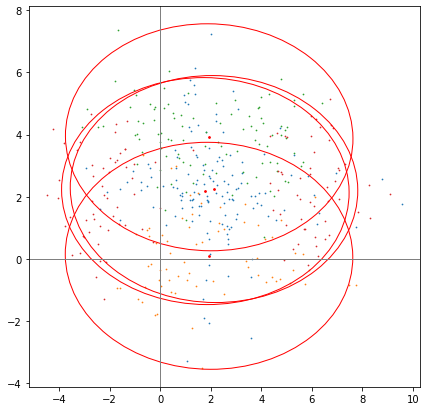

In [93]:
i = 0
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
# fig, axs = plt.subplots(1, 2, figsize=(19, 7))
for xs in xes:
    print(f"Class {i+1}")
#     for ax, cov in zip(axs, clf.get_cov()):
    cov = clf.get_cov()    
    x = xs['x1'].to_numpy()
    y = xs['x2'].to_numpy()
    ax.scatter(x, y, s=0.5)
#     print(x.shape,y)
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red', cov=cov[i])

    ax.scatter(x.mean(), y.mean(), c='red', s=3)
    print(cov[i])
    i += 1
    
plt.show()

In [94]:
clf = MahalanobisBinaryClassifier(xtrain, ytrain, cov_type='shared_scalar')    

predicted = clf.predict(xtest)
from sklearn.metrics import accuracy_score
shared_scalar = accuracy_score(predicted, ytest.to_numpy())

Class 1
[[5.72136391 0.        ]
 [0.         5.72136391]]
Class 2
[[5.72136391 0.        ]
 [0.         5.72136391]]
Class 3
[[5.72136391 0.        ]
 [0.         5.72136391]]
Class 4
[[5.72136391 0.        ]
 [0.         5.72136391]]


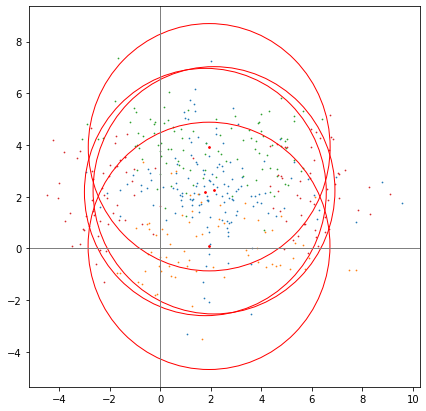

In [95]:
i = 0
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
# fig, axs = plt.subplots(1, 2, figsize=(19, 7))
for xs in xes:
    print(f"Class {i+1}")
#     for ax, cov in zip(axs, clf.get_cov()):
    cov = clf.get_cov()    
    x = xs['x1'].to_numpy()
    y = xs['x2'].to_numpy()
    ax.scatter(x, y, s=0.5)
#     print(x.shape,y)
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red', cov=cov[i])

    ax.scatter(x.mean(), y.mean(), c='red', s=3)
    print(cov[i])
    i += 1
    
plt.show()

# Диагональная общая

In [96]:
clf = MahalanobisBinaryClassifier(xtrain, ytrain, cov_type='shared_diagonal')        

predicted = clf.predict(xtest)
from sklearn.metrics import accuracy_score
shared_diagonal = accuracy_score(predicted, ytest.to_numpy())

Class 1
[[8.06617593 0.        ]
 [0.         3.32854053]]
Class 2
[[8.06617593 0.        ]
 [0.         3.32854053]]
Class 3
[[8.06617593 0.        ]
 [0.         3.32854053]]
Class 4
[[8.06617593 0.        ]
 [0.         3.32854053]]


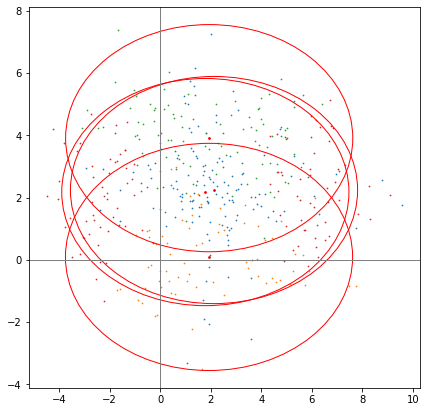

In [97]:
i = 0
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
# fig, axs = plt.subplots(1, 2, figsize=(19, 7))
for xs in xes:
    print(f"Class {i+1}")
#     for ax, cov in zip(axs, clf.get_cov()):
    cov = clf.get_cov()    
    x = xs['x1'].to_numpy()
    y = xs['x2'].to_numpy()
    ax.scatter(x, y, s=0.5)
#     print(x.shape,y)
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red', cov=cov[i])

    ax.scatter(x.mean(), y.mean(), c='red', s=3)
    print(cov[i])
    i += 1
    
plt.show()

# Различная

# Naive Bayes classifier

In [98]:
clf = MahalanobisBinaryClassifier(xtrain, ytrain, cov_type='diff')        
pred_probs = clf.predict_proba(xtest)
pred_class = clf.predict(xtest)
from sklearn.metrics import accuracy_score
diff = accuracy_score(pred_class, ytest)


Class 1
[[ 3.7646722  -0.31481161]
 [-0.31481161  2.50785403]]
Class 2
[[ 5.28824294 -0.00557011]
 [-0.00557011  1.57181513]]
Class 3
[[ 5.45517703 -0.47891603]
 [-0.47891603  1.23258729]]
Class 4
[[18.26434     0.5729065 ]
 [ 0.5729065   1.92122172]]


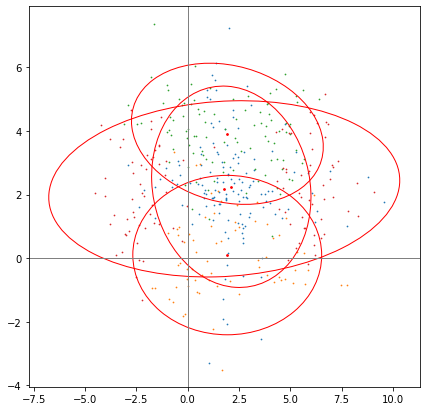

In [99]:
i = 0
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
for xs in xes:
    print(f"Class {i+1}")
    cov = clf.get_cov()    
    x = xs['x1'].to_numpy()
    y = xs['x2'].to_numpy()
    ax.scatter(x, y, s=0.5)
#     print(x.shape,y)
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red', cov=cov[i])

    ax.scatter(x.mean(), y.mean(), c='red', s=3)
    print(cov[i])
    i += 1
    
plt.show()

In [100]:
from scipy.stats import multivariate_normal

In [101]:
def calculate_covariance_matrix(X, Y=None):
    """ Calculate the covariance matrix for the dataset X """
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))
    return np.array(covariance_matrix, dtype=float)

In [102]:
# ans = []
# for x in xtrain.to_numpy():
#     scores_list = []
#     for xs in xes:
#         cov = calculate_covariance_matrix(xs)
#         mean = list(xs.mean())
#         var = multivariate_normal(mean=mean, cov=cov)
#         score = var.pdf(x)
#         scores_list.append(score)
#     ans.append(np.argmax(scores_list) +1)


In [103]:
# diff = accuracy_score(ans, ytrain)

In [104]:
# i = 0
# fig = plt.figure(figsize=(7,7))
# ax = fig.add_subplot(111)
# for xs in xes:
#     print(f"Class {i+1}")
#     cov = clf.get_cov()    
#     x = xs['x1'].to_numpy()
#     y = xs['x2'].to_numpy()
#     ax.scatter(x, y, s=0.5)
# #     print(x.shape,y)
#     ax.axvline(c='grey', lw=1)
#     ax.axhline(c='grey', lw=1)

#     confidence_ellipse(x, y, ax, edgecolor='red', cov=cov[i])

#     ax.scatter(x.mean(), y.mean(), c='red', s=3)
#     print(cov[i])
#     i += 1
    
# plt.show()

# Диагональная различная

In [105]:
from scipy.stats import multivariate_normal

In [106]:
def calculate_variance(X):
    X = X.to_numpy()
    """ Return the variance of the features in dataset X """
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))
    
    return variance


def covariance_diag(X):
    variances = calculate_variance(X)
    d = np.diag(variances)
    return d



In [107]:
ans = []
probs = []
for x in xtrain.to_numpy():
    scores_list = []
    for xs in xes:
        cov = covariance_diag(xs)
        mean = list(xs.mean())
        var = multivariate_normal(mean=mean, cov=cov)
        score = var.pdf(x)
        scores_list.append(score)
    probs.append(max(scores_list))
    ans.append(np.argmax(scores_list) +1)
    


In [108]:
diag_diff = accuracy_score(ans, ytrain)

Class 1
[[3.73778169 0.        ]
 [0.         2.48994079]]
Class 2
[[5.21376064 0.        ]
 [0.         1.54967689]]
Class 3
[[5.4016949 0.       ]
 [0.        1.2205031]]
Class 4
[[18.09364523  0.        ]
 [ 0.          1.90326638]]


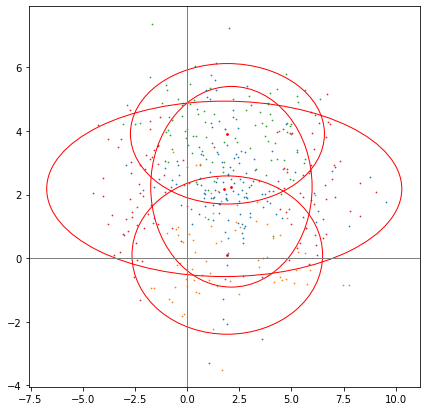

In [109]:
i = 0
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
for xs in xes:
    print(f"Class {i+1}")
    cov = covariance_diag(xs)
    x = xs['x1'].to_numpy()
    y = xs['x2'].to_numpy()
    ax.scatter(x, y, s=0.5)
#     print(x.shape,y)
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red', cov=cov)

    ax.scatter(x.mean(), y.mean(), c='red', s=3)
    print(cov)
    i += 1
    
plt.show()

# Различная скалярная

In [110]:
from scipy.stats import multivariate_normal

In [111]:
# cov = np.diag(np.array([np.var(sex.to_numpy()),np.var(self.x.to_numpy())]))
def diff_scalar_cov(x):
    cov = np.diag(np.array([np.var(x.to_numpy()),np.var(x.to_numpy())]))
    return cov

In [112]:
ans = []
for x in xtrain.to_numpy():
    scores_list = []
    for xs in xes:
        cov = diff_scalar_cov(xs)
        mean = list(xs.mean())
        var = multivariate_normal(mean=mean, cov=cov)
        score = var.pdf(x)
        scores_list.append(score)
    ans.append(np.argmax(scores_list) +1)
    


In [113]:
scalar_diff = accuracy_score(ans, ytrain)

Class 1
[[3.11734858 0.        ]
 [0.         3.11734858]]
Class 2
[[4.22199881 0.        ]
 [0.         4.22199881]]
Class 3
[[4.28636071 0.        ]
 [0.         4.28636071]]
Class 4
[[10.03756095  0.        ]
 [ 0.         10.03756095]]


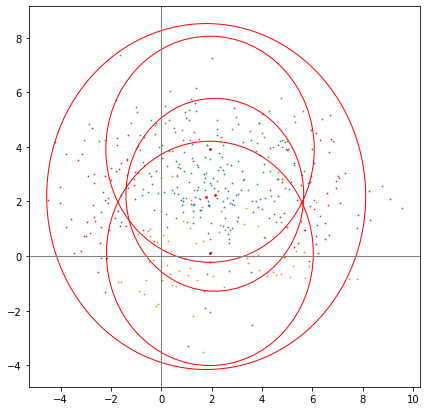

In [114]:
i = 0
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
for xs in xes:
    print(f"Class {i+1}")
    cov = diff_scalar_cov(xs)   
    x = xs['x1'].to_numpy()
    y = xs['x2'].to_numpy()
    ax.scatter(x, y, s=0.5)
#     print(x.shape,y)
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red', cov=cov)

    ax.scatter(x.mean(), y.mean(), c='red', s=3)
    print(cov)
    i += 1
    
plt.show()

# 3. Рассчитать точности (accuracy) построенных классификаторов на обучающей и тестовой выборках, представить данные в графическом виде (bar charts).

In [115]:
scores_color = ['blue', 'red', 'yellow', 'green' ,'black', 'cyan', 'magenta']
scores_test = [shared_scalar, scalar_diff, shared_diagonal, diag_diff, shared, diff] 
final_scores = {}
i = 0


Text(0, 0.5, 'type of cov')

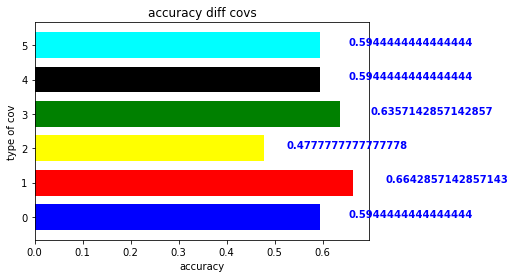

In [116]:
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ax.barh(range(len(scores_test)), scores_test, width, color=scores_color)

for i, v in enumerate(scores_test):
    ax.text(v + v/10, i, str(v), color='blue', fontweight='bold')
plt.title('accuracy diff covs')
plt.xlabel('accuracy')
plt.ylabel('type of cov')